3272. Find the Count of Good Integers
Hard
Topics
Companies
Hint
You are given two positive integers n and k.

An integer x is called k-palindromic if:

x is a palindrome.
x is divisible by k.
An integer is called good if its digits can be rearranged to form a k-palindromic integer. For example, for k = 2, 2020 can be rearranged to form the k-palindromic integer 2002, whereas 1010 cannot be rearranged to form a k-palindromic integer.

Return the count of good integers containing n digits.

Note that any integer must not have leading zeros, neither before nor after rearrangement. For example, 1010 cannot be rearranged to form 101.

 

Example 1:

Input: n = 3, k = 5

Output: 27

Explanation:

Some of the good integers are:

551 because it can be rearranged to form 515.
525 because it is already k-palindromic.
Example 2:

Input: n = 1, k = 4

Output: 2

Explanation:

The two good integers are 4 and 8.

Example 3:

Input: n = 5, k = 6

Output: 2468

 

Constraints:

1 <= n <= 10
1 <= k <= 9

In [ ]:

class Solution:
    def countGoodIntegers(self, n: int, k: int) -> int:
        pass


sol=Solution()

assert sol.countGoodIntegers(3,5)==27
assert sol.countGoodIntegers(1,4)==2
assert sol.countGoodIntegers(5,6)==2468



AssertionError: 

In [14]:
from collections import Counter
from math import factorial
from itertools import product

class Solution:
    def countGoodIntegers(self, num_digits: int, divisor: int) -> int:
        valid_digit_frequencies = set()

        def frequency_to_tuple(freq_dict):
            return tuple(freq_dict.get(str(digit), 0) for digit in range(10))

        def construct_palindrome(left_half, middle_digit=""):
            return "".join(left_half) + middle_digit + "".join(reversed(left_half))

        if num_digits == 1:
            for single_digit in range(1, 10):
                if single_digit % divisor == 0:
                    valid_digit_frequencies.add(frequency_to_tuple(Counter(str(single_digit))))
        else:
            half_length = num_digits // 2
            all_digits = '0123456789'

            left_half_combinations = product(all_digits, repeat=half_length)

            if num_digits % 2 == 0:
                for left_half in left_half_combinations:
                    if left_half[0] == '0':
                        continue  
                    palindrome_str = construct_palindrome(left_half)
                    palindrome_value = int(palindrome_str)
                    if palindrome_value % divisor == 0:
                        valid_digit_frequencies.add(frequency_to_tuple(Counter(palindrome_str)))
            else:

                for left_half in left_half_combinations:
                    if left_half[0] == '0':
                        continue 
                    for middle_digit in all_digits:
                        palindrome_str = construct_palindrome(left_half, middle_digit)
                        palindrome_value = int(palindrome_str)
                        if palindrome_value % divisor == 0:
                            valid_digit_frequencies.add(frequency_to_tuple(Counter(palindrome_str)))

        print(len(valid_digit_frequencies))
        print(valid_digit_frequencies)
        total_valid_permutations = 0
        for freq_tuple in valid_digit_frequencies:
            digit_counts = list(freq_tuple)


            total_permutations = factorial(num_digits)
            for count in digit_counts:
                total_permutations //= factorial(count)

            invalid_permutations = 0
            if digit_counts[0] > 0:
                remaining_counts = digit_counts.copy()
                remaining_counts[0] -= 1
                invalid_permutations = factorial(num_digits - 1)
                for count in remaining_counts:
                    invalid_permutations //= factorial(count)

            valid_permutations = total_permutations - invalid_permutations
            total_valid_permutations += valid_permutations

        return total_valid_permutations


sol=Solution()
assert sol.countGoodIntegers(3,5)==27
# assert sol.countGoodIntegers(1,4)==2
# assert sol.countGoodIntegers(5,6)==2468

10
{(0, 0, 0, 0, 0, 3, 0, 0, 0, 0), (0, 0, 0, 0, 1, 2, 0, 0, 0, 0), (0, 0, 0, 0, 0, 2, 0, 0, 0, 1), (0, 0, 1, 0, 0, 2, 0, 0, 0, 0), (0, 0, 0, 0, 0, 2, 0, 1, 0, 0), (0, 0, 0, 0, 0, 2, 0, 0, 1, 0), (0, 1, 0, 0, 0, 2, 0, 0, 0, 0), (1, 0, 0, 0, 0, 2, 0, 0, 0, 0), (0, 0, 0, 1, 0, 2, 0, 0, 0, 0), (0, 0, 0, 0, 0, 2, 1, 0, 0, 0)}


- backtracking
- combinatorics

- Step 1 : generate all palindromes of length n
    - use backtracking to generate all palindromes of length n

- Step 2 : only keep palindromes divisible by k

- Step 3 : Convert each palindromes into a digit frequency pattern

- Step 4 : instead of storing the palindromes, store the digit frequency patterns,(basically how many times each digit appears)
    - 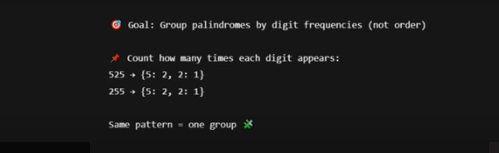



In [ ]:
class Solution(object):
    def __init__(self):
        self.palindromes = []
        self.fact = [1] * 11

    def make_palindrome(self, num, is_odd):
        s = str(num)
        result = s
        idx = len(s) - 1
        if is_odd:
            idx -= 1
        while idx >= 0:
            result += s[idx]
            idx -= 1
        print(s,result)
        return int(result)



    def generate_palindromes(self, n, k):# n=3,k=5
        half = (n + 1) // 2
        start = 10**(half - 1)
        end = 10**half
        for i in range(start, end):
            palindrome = self.make_palindrome(i, n % 2)
            if palindrome % k == 0:
                self.palindromes.append(palindrome)

    def count_valid_permutations(self, s):
        from collections import Counter

        frequency = Counter(s)
        print(frequency)
        total_permutations = self.fact[len(s)]
        for count in frequency.values():
            total_permutations //= self.fact[count]
# ----------------------------------
        if '0' in frequency and frequency['0'] > 0:
            frequency['0'] -= 1
            invalid_permutations = self.fact[len(s) - 1]
            for count in frequency.values():
                invalid_permutations //= self.fact[count]
            total_permutations -= invalid_permutations

        return total_permutations
g
    def initialize_factorials(self):
        for i in range(2, 11):
            self.fact[i] = self.fact[i - 1] * i

    def countGoodIntegers(self, n, k):
        """
        :type n: int
        :type k: int
        :rtype: int
        """
        self.palindromes = []
        self.initialize_factorials()
        self.generate_palindromes(n, k)
        print(self.palindromes)
        total_count = 0
        unique_permutations = set()

        for palindrome in self.palindromes:
            s = str(palindrome)
            sorted_s = ''.join(sorted(s))
            if sorted_s not in unique_permutations:
                unique_permutations.add(sorted_s)
                total_count += self.count_valid_permutations(sorted_s)
        return total_count


if __name__ == '__main__':
    solution = Solution()
    print(solution.countGoodIntegers(3, 5))
